## 1. Linear regression vs ANN
   #  Manual feature engineering
   #  How ANN engineers features from inputs?
   

## Neural Network Basics
 # 1. Introduction to Keras
 # 2. Keras Sequential NN model

 # 3. Compare the effectiveness ANN ultiple Regresiom.

 # 4. Demonnstrate that a better understanding of the problem to be solved allows engineering features that can enriches the inputs information and enhance the performance of ANN


## Keras created by Google as a high-level neural network API. 
 # It simplies deep learning and artificial intelligence application. 
  # It runs on top of a number of lower-level libraries, used as backends, including TensorFlow.

## 1. Linear regression vs ANN

# Import some libraries

In [ ]:
## First we need to update numpy

pip install numpy==1.20.3

In [6]:
import os

In [7]:
wd_path = '/Users/yusifsimaan/Dropbox/classes/2U/Machine learning/2u Planning/9_Feature Engineering and ANN'

In [8]:
os.chdir(wd_path)
os.getcwd()

'/Users/yusifsimaan/Dropbox/classes/2U/Machine learning/2u Planning/9_Feature Engineering and ANN'

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Let us list files in our working directory

In [10]:
!ls

Feature ENgineering and ANN.pptx
Feature Engineering and ANN-v2.ipynb
Feature Engineering.pptx
Features from data created by 'yahooquery'.ipynb
The 7 Types of ANN Machine Learning Engineers You Need to Know.docx
alpaca example.ipynb
data_for_class.cav
downloaded_Feature engineering and ANN implementation-20230621.ipynb
out_fo_LDA_and_classification.csv
spy10_raw2023-05-24.csv
top10_ret_volume_2023-05-24.csv
top10_ret_volume_2023-05-29.csv
top10_ret_volume_2023-06-05.csv
top10_ret_volume_2023-06-24.csv
~$Feature ENgineering and ANN.pptx
~$e 7 Types of ANN Machine Learning Engineers You Need to Know.docx


In [11]:
d0 =  pd.read_csv('top10_ret_volume_2023-05-24.csv')
d1  =  pd.read_csv('top10_ret_volume_2023-06-24.csv') 

In [ ]:
d0.columns

In [12]:
d0_ = d0 [ d0['day'] < '2023-05-23']
d1_ = d1 [ d1['day'] > '2023-05-22']

In [13]:
data0 = pd.concat([d0_,d1_])

In [14]:
data0.shape

(531532, 43)

In [15]:
data0[['symbol','etf' , 'day' , 'time' ]].describe()
    

,symbol,etf,day,time
count,531532,531532,531532,531532
unique,112,11,62,79
top,MSFT,XLK,2023-03-27,09:30:00
freq,4837,48370,8580,6816


In [16]:
pd.DataFrame( data0['symbol'].value_counts() ).describe()

,symbol
count,112.000000
mean,4745.821429
std,488.859626
min,1429.000000
25%,4837.000000
50%,4837.000000
75%,4837.000000
max,4837.000000


In [17]:
data0['etf'].value_counts()

XLK     48370
XLP     48370
XLU     48370
XLE     48370
XLC     48369
XLI     48369
XLV     48368
XLF     48354
XLB     48352
XLRE    48325
XLY     47915
Name: etf, dtype: int64

In [18]:
data0['time'].value_counts()

09:30:00    6816
09:40:00    6816
09:45:00    6816
09:50:00    6816
09:55:00    6816
            ... 
15:00:00    6811
14:55:00    6811
14:50:00    6811
15:55:00    6810
16:00:00     103
Name: time, Length: 79, dtype: int64

## we have 5-minutes return and volume data for 62, for each symbol, daysstarting at 9:30 and ending at 15:55
# Let us filer out time = 16:00:00

In [19]:
data = data0[data0['time']< '16:00:00']
print ( data0.shape, data.shape)

(531532, 43) (531429, 43)


In [20]:
data['symbol'].unique()

array(['MSFT', 'AAPL', 'NVDA', 'AVGO', 'CRM', 'CSCO', 'ACN', 'ADBE',
       'TXN', 'ORCL', 'UNH', 'JNJ', 'LLY', 'MRK', 'ABBV', 'PFE', 'TMO',
       'ABT', 'DHR', 'BMY', 'AMZN', 'TSLA', 'HD', 'NKE', 'MCD', 'SBUX',
       'LOW', 'BKNG', 'TJX', 'ORLY', 'META', 'GOOGL', 'GOOG', 'CMCSA',
       'NFLX', 'DIS', 'CHTR', 'VZ', 'TMUS', 'ATVI', 'BRK-B', 'JPM', 'V',
       'MA', 'BAC', 'WFC', 'SPGI', 'MS', 'GS', 'BLK', 'RTX', 'HON', 'UPS',
       'UNP', 'BA', 'CAT', 'GE', 'LMT', 'DE', 'ADP', 'PG', 'PEP', 'KO',
       'COST', 'MDLZ', 'WMT', 'PM', 'MO', 'TGT', 'CL', 'NEE', 'SO', 'DUK',
       'SRE', 'D', 'AEP', 'EXC', 'XEL', 'ED', 'PEG', 'LIN', 'APD', 'SHW',
       'FCX', 'CTVA', 'ECL', 'DOW', 'NEM', 'NUE', 'PPG', 'PLD', 'AMT',
       'EQIX', 'CCI', 'PSA', 'O', 'WELL', 'SPG', 'VICI', 'DLR', 'XOM',
       'CVX', 'EOG', 'COP', 'SLB', 'MPC', 'PXD', 'PSX', 'OXY', 'VLO',
       'AMD', 'CMG'], dtype=object)

## The following creates a data frame form daily  volume by symbol

In [22]:
by_sym_day_volume = data.groupby(['symbol','day'])['volume'].sum().reset_index()

## Here is a data frame of symbols sorted by dedian daily volume sorted by descending order

In [23]:
by_sym_volume = by_sym_day_volume.groupby('symbol').median().reset_index()
by_sym_volume = by_sym_volume.sort_values('volume', ascending=False)

/var/folders/nd/mvq13b8j3msfgn8hkg4r_p200000gn/T/ipykernel_40327/2494541566.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_sym_volume = by_sym_day_volume.groupby('symbol').median().reset_index()


## Here we select 30 stocks with the highes median daily volume

In [24]:
syms_ = by_sym_volume.head(30)


## Here is the list of such symbols

In [25]:
syms=list( syms_['symbol'] )
print(syms)

['TSLA', 'AMD', 'AMZN', 'AAPL', 'BAC', 'NVDA', 'GOOGL', 'MSFT', 'GOOG', 'META', 'WFC', 'PFE', 'VZ', 'CMCSA', 'CSCO', 'XOM', 'FCX', 'OXY', 'DIS', 'KO', 'JPM', 'SLB', 'ORCL', 'NEM', 'BMY', 'CVX', 'MO', 'NEE', 'NFLX', 'MS']


## In our analysis we will focus the above 30 stock
 # Thus we filter data frame sym0 for these stocks

In [26]:
syms0= data[data['symbol'].isin(syms)]
print( data0.shape, syms0.shape )

(531532, 43) (141946, 43)


In [27]:
syms0.columns

Index(['symbol', 'etf', 'day', 'time', 'high', 'low', 'next_ret', 'ret',
       'prev1_ret', 'prev2_ret', 'prev3_ret', 'prev4_ret', 'volume', 'mflow1',
       'mflow2', 'mflow3', 'mflow4', 'spy_high', 'spy_low', 'spy_next_ret',
       'spy_ret', 'spy_prev1_ret', 'spy_prev2_ret', 'spy_prev3_ret',
       'spy_prev4_ret', 'spy_volume', 'spy_mflow1', 'spy_mflow2', 'spy_mflow3',
       'spy_mflow4', 'etf_high', 'etf_low', 'etf_next_ret', 'etf_ret',
       'etf_prev1_ret', 'etf_prev2_ret', 'etf_prev3_ret', 'etf_prev4_ret',
       'etf_volume', 'etf_mflow1', 'etf_mflow2', 'etf_mflow3', 'etf_mflow4'],
      dtype='object')

In [28]:
syms0.isnull().sum()

symbol              0
etf                 0
day                 0
time                0
high                0
low                 0
next_ret         1796
ret                 0
prev1_ret        1818
prev2_ret        3635
prev3_ret        5455
prev4_ret        7274
volume              0
mflow1           1818
mflow2           3635
mflow3           5455
mflow4           7274
spy_high            0
spy_low             0
spy_next_ret     1790
spy_ret             0
spy_prev1_ret    1820
spy_prev2_ret    3640
spy_prev3_ret    5460
spy_prev4_ret    7280
spy_volume          0
spy_mflow1       1820
spy_mflow2       3640
spy_mflow3       5460
spy_mflow4       7280
etf_high            0
etf_low             0
etf_next_ret     1790
etf_ret             0
etf_prev1_ret    1820
etf_prev2_ret    3640
etf_prev3_ret    5460
etf_prev4_ret    7280
etf_volume          0
etf_mflow1       1820
etf_mflow2       3640
etf_mflow3       5460
etf_mflow4       7280
dtype: int64

## Comments on some columns

In [29]:
syms0.columns

Index(['symbol', 'etf', 'day', 'time', 'high', 'low', 'next_ret', 'ret',
       'prev1_ret', 'prev2_ret', 'prev3_ret', 'prev4_ret', 'volume', 'mflow1',
       'mflow2', 'mflow3', 'mflow4', 'spy_high', 'spy_low', 'spy_next_ret',
       'spy_ret', 'spy_prev1_ret', 'spy_prev2_ret', 'spy_prev3_ret',
       'spy_prev4_ret', 'spy_volume', 'spy_mflow1', 'spy_mflow2', 'spy_mflow3',
       'spy_mflow4', 'etf_high', 'etf_low', 'etf_next_ret', 'etf_ret',
       'etf_prev1_ret', 'etf_prev2_ret', 'etf_prev3_ret', 'etf_prev4_ret',
       'etf_volume', 'etf_mflow1', 'etf_mflow2', 'etf_mflow3', 'etf_mflow4'],
      dtype='object')

## Note that,
 # ret          is the stock's return over the 5-minutes ending at time t
 # volume  is the stock's volume over the 5-minutes ending at time t
## next_ret   is the stock's return over the 5-minutes starting at time t
 # At time t,  ret and volume are known, but next_ret is not know.

## Suppose that 
 # we want to predict next_ret at time t using [ret, volume]) at time t

## First, let us look at the following correlation matrix

In [30]:
syms0[['next_ret' , 'ret' , 'spy_ret', 'etf_ret' , 'volume']].corr()

,next_ret,ret,spy_ret,etf_ret,volume
next_ret,1.000000,-0.017252,-0.004311,-0.013681,-0.006531
ret,-0.017252,1.000000,0.359723,0.583914,0.005168
spy_ret,-0.004311,0.359723,1.000000,0.638500,-0.007762
etf_ret,-0.013681,0.583914,0.638500,1.000000,0.004881
volume,-0.006531,0.005168,-0.007762,0.004881,1.000000


## Obviously, predicting 'next_ret' is a very challenging task
 # Remember the Efficient Market Hypothesis?


# The Efficient Market Hypothesis (EMH) implies that past information, including past returns, do not help predicting future return.

 # Or, the best price prediction of future price is current price. 
  # This does not mean that then next price will be the same as current price. It means that unexpected events will cause such price changes. Our complete ignorance (of the unexpected) does not lead us to other prediction. 
  
  # Without the knowledge of these unexpected events, the current price contains all the information about the future price

## Nevertheless, day traders do try. 

 # Remember,

 # ( i )They have access to more information than we have, like order-book imbalances, at different book levels, for different market centers.
 
  # ( i i ) While markets are efficient most of the time, short-lived pockets of inefficiencies can exist.
  
   # ( i i i ) Better speed of execution, cheaper execution cost can make trading, based such prediction, a profitable effort.  
  # successful trading requires 
   # (a) locating rare profitable opportunity, 
   # (b) monitoring inventory of stockholdings and,
   # (c) adjusting a stock trading trigers based on its prediction, its inventory, and its impact on the risk of the inventory portfolio. 

# Here we will focus on,

 # (i) using Linear regression
 # (ii) examine wht ANN can add to the prediction
 # (iii) Discuss whether clever feature engineering can help prediction without and with ANN

## 1. Simple regression model

In [31]:
XY0= syms0[['ret', 'volume', 'next_ret']].dropna()
X0= XY0[['ret', 'volume']]
y = XY0['next_ret']
X0 = sm.add_constant(X0)
lm0 = sm.OLS(y, X0).fit()
lm0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               next_ret   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     23.79
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           4.70e-11
Time:                        11:12:30   Log-Likelihood:             7.1249e+05
No. Observations:              140150   AIC:                        -1.425e+06
Df Residuals:                  140147   BIC:                        -1.425e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.035e-05   4.59e-06      2.255      0.024    1.35e-06    1.93e-05
ret           -0.0163      0.003     -6.449      0.000      -0.021      -0.011
volume     -2.004e-11   8.29e-12     -2.418      0.016   -3.63e-11    -3.8e-12
==============================================================================
Omnibus:                    22323.524   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           406311.495
Skew:                          -0.144   Prob(JB):                         0.00
Kurtosis:                      11.336   Cond. No.                     3.50e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
r = np.sqrt( lm0.rsquared )
round( r, 6)

0.018421

## Not a great predictive model. Still we have a significant F-stat 

# The above regression assumes that the effects of ret and volume are additive.
  ## What if there are non-linear effects
  ## We call such effects,
 
 #                                     interactions. 
   # For example, 
 ## (i ) What if the slope of 'ret'with respect to 'next_ret' is different. For example, a strong move may cause reversion while mediocre move does not cause reversion
 ## (ii ) What if strong volume and strong 'ret' has distinct impact on 'next_ret'.
 ## ( iii ) what if a non-linear fumction of volume provide a predictive power that volume itself can't provide

## First let us describe the variables that capture the information on which we will base our prediction

In [33]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
syms0[['ret', 'volume', 'next_ret']].describe()

,ret,volume,next_ret
count,141946.000000,141946.000000,140150.000000
mean,0.000007,279887.883963,0.000005
std,0.001584,496024.170354,0.001500
min,-0.023044,0.000000,-0.020306
25%,-0.000716,66773.500000,-0.000708
50%,0.000000,129391.000000,0.000000
75%,0.000757,285435.250000,0.000748
max,0.027268,24013993.000000,0.027268


## Note that return and volume have different units. 

 # prediction minimzes mean-square-error (MSE). Different units are likely to result in placing more weight on the variable with the higher magnitudes

# Later we will standarize the data in order to neutralize the eff

# let us look at the distribution of 'ret'. Here we are importing seaborn and matplotlib and graphing some distributions

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

(-0.02, 0.02)

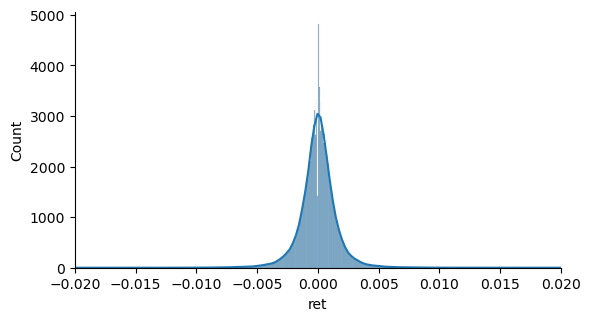

In [35]:
g= sns.displot(syms0, x="ret" , kde=True)
g.fig.set_figwidth(6)
g.fig.set_figheight(3)
plt.xlim(0, 150000)
plt.xlim(-0.02, 0.02)

## Very much normal, or at least symmetric

## On the other hand the distribution of volume is very skewed

## First let us filter out zero volume data and then graph the distribution of volume

(102.0, 24013993.0)

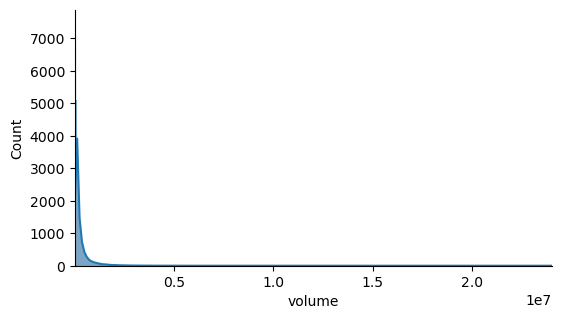

In [36]:
syms= syms0[syms0['volume']> 0]
g = sns.displot(syms, x="volume" , kde=True)
g.fig.set_figwidth(6)
g.fig.set_figheight(3)
plt.xlim(syms['volume'].min(), syms['volume'].max())

# The above picture is distorted by extreme volume values
## Here we limit the upper volume to its 95th quantile

(102.0, 1042226.9999999984)

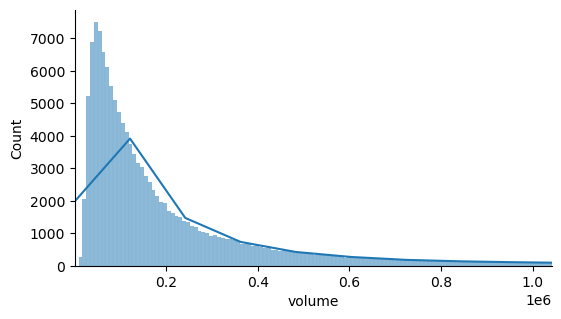

In [37]:

g = sns.displot(syms, x="volume" , kde=True)
g.fig.set_figwidth(6)
g.fig.set_figheight(3)
plt.xlim(syms['volume'].min(), syms['volume'].quantile(0.95))

## Very skewed distributution

# Standarization helps make all variables have the same scale.
 ## some times we may want to transformsom variables so that their distributions are similar.
 
 ## Let us introduce two transformations of volume by creating two columns:

# 1. This one creates a transformed variable with a zero mean and std=1. 

In [38]:
syms['standaized_volume']= ( syms['volume'] - syms['volume'].mean() )/ syms['volume'].std()


/var/folders/nd/mvq13b8j3msfgn8hkg4r_p200000gn/T/ipykernel_40327/3473099547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syms['standaized_volume']= ( syms['volume'] - syms['volume'].mean() )/ syms['volume'].std()


In [39]:
syms[['volume', 'standaized_volume']].describe()

,volume,standaized_volume
count,141917.000000,141917.000000
mean,279945.077595,0.000000
std,496058.709962,1.000000
min,102.000000,-0.564133
25%,66803.000000,-0.429671
50%,129429.000000,-0.303424
75%,285484.000000,0.011166
max,24013993.000000,47.845240


## Let us see whether this distribution impacts skewness

(0.0, 47.84523977862581)

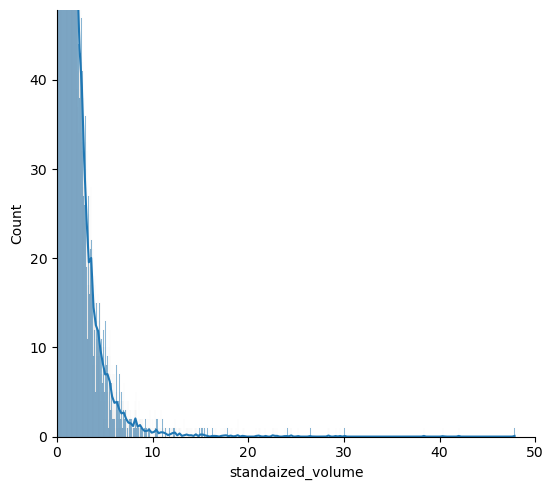

In [40]:
g= sns.displot(syms, x="standaized_volume" , kde=True)
g.fig.set_figwidth(6)
g.fig.set_figheight(5)
plt.xlim(0, 50)
plt.ylim(0, syms['standaized_volume'].max())

# The above destribution changes location and scale unites. 
 ## However, it does not take care of skewness

## Another transformation is taking natural log of volume. However, the log function is not defined for a zero or negative arguments. Let us check if we need to filter out cases with zero volume

In [41]:
syms[syms['volume']== 0]

,symbol,etf,day,time,high,low,next_ret,ret,prev1_ret,prev2_ret,...,etf_prev1_ret,etf_prev2_ret,etf_prev3_ret,etf_prev4_ret,etf_volume,etf_mflow1,etf_mflow2,etf_mflow3,etf_mflow4,standaized_volume


## No zero volume is found

In [43]:
syms['log_volume'] =  np.log(syms['volume'])

/var/folders/nd/mvq13b8j3msfgn8hkg4r_p200000gn/T/ipykernel_40327/1499096184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syms['log_volume'] =  np.log(syms['volume'])


(4.624972813284271, 16.99414726007613)

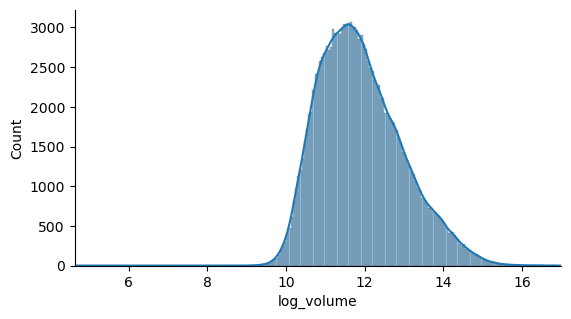

In [44]:
g=sns.displot(syms, x="log_volume" , kde=True)
g.fig.set_figwidth(6)
g.fig.set_figheight(3)
plt.xlim(syms['log_volume'].min(), syms['log_volume'].max())

## A much more symmetric distribution symmetric

# Some "manual" methods to capture non-linear effect:

 ## I say manual because ANN is designed to capture non-linearity in the input variables in a general algorithm.

## Inntuitively, next_ret may response to strong up return differently that to a mediocre return or to a strong negative return. 

# Like the case of a pendulum,
 ## a weak force may have little impact, while a strong force results in an opposite direction swing. In finance we call this pendelum effect  'mean-reversion' . How can we test for that?

# We can engineer two features from the variable 'ret': 

## (i) Capture the current return, 'ret' , when it is only strong up; And,
## (ii) capture it when it is only strong down.

# we need threshold to determine up oand down. here is an example

## examine the following two variables


In [45]:
q90 = syms['ret'].quantile(0.90)
q10 = syms['ret'].quantile(0.10)
syms['ret_q90'] = np.where(syms['ret'] > q90 , syms['ret']- q90 ,0 )
syms['ret_q10'] = np.where(syms['ret'] < q10 , syms['ret']- q10, 0 )
syms[['ret' , 'ret_q90' , 'ret_q10']].describe()

/var/folders/nd/mvq13b8j3msfgn8hkg4r_p200000gn/T/ipykernel_40327/3925062868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syms['ret_q90'] = np.where(syms['ret'] > q90 , syms['ret']- q90 ,0 )
/var/folders/nd/mvq13b8j3msfgn8hkg4r_p200000gn/T/ipykernel_40327/3925062868.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syms['ret_q10'] = np.where(syms['ret'] < q10 , syms['ret']- q10, 0 )


,ret,ret_q90,ret_q10
count,141917.000000,141917.000000,141917.000000
mean,0.000007,0.000117,-0.000124
std,0.001584,0.000589,0.000615
min,-0.023044,0.000000,-0.021437
25%,-0.000716,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000757,0.000000,0.000000
max,0.027268,0.025664,0.000000


In [46]:
syms[['next_ret','ret' , 'ret_q10' , 'ret_q90']].corr()

,next_ret,ret,ret_q10,ret_q90
next_ret,1.000000,-0.017218,-0.004776,-0.011878
ret,-0.017218,1.000000,0.609270,0.586728
ret_q10,-0.004776,0.609270,1.000000,0.040015
ret_q90,-0.011878,0.586728,0.040015,1.000000


# Note how next_ret correlate differently between the three variables. 
 ## it looks like strong moves ( up or down ) exhibits more reversion.

# ANN uses activation functions to capture non-linear effects-- i.e. interactions.
## Introducing Activation function ReLU ( Rectified Linear Unit). Recently most ML algorithms use such activation function

In [48]:
def relu(x):
    y = np.maximum(0,x)
    return(y)

## Here is a graph of this function

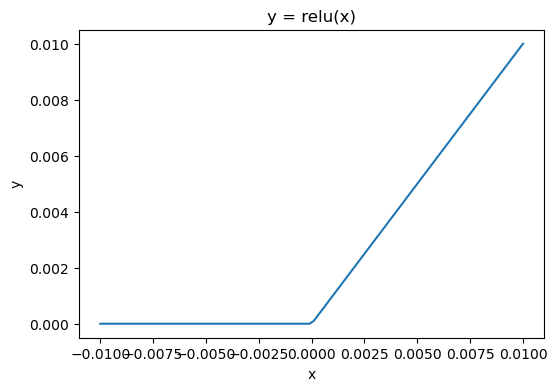

In [49]:
x= np.linspace(-0.01, 0.01, 100)
y = relu(x)
plt.figure(figsize=(6,4))
plt.plot(list(x),list(y) )
plt.title ( "y = relu(x)" ) 
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Here is a graph of the first engineered features

<AxesSubplot: xlabel='ret', ylabel='ret_q90'>

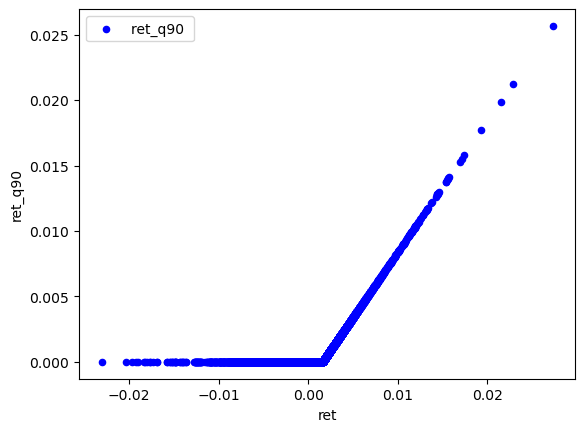

In [50]:
syms.plot(kind= 'scatter' , x= 'ret', y='ret_q90', color='b', label = 'ret_q90 ')

## This is exactly relu(ret - q90 ). Let us verify that

In [52]:
syms['relu_ret - q90'] = (syms['ret']-q90).apply(relu)
print( syms[['ret_q90', 'relu_ret - q90']].agg(['mean', 'std']) )
syms[['ret_q90', 'relu_ret - q90']].corr()

      ret_q90  relu_ret - q90
mean 0.000117        0.000117
std  0.000589        0.000589


/var/folders/nd/mvq13b8j3msfgn8hkg4r_p200000gn/T/ipykernel_40327/2863716028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syms['relu_ret - q90'] = (syms['ret']-q90).apply(relu)


,ret_q90,relu_ret - q90
ret_q90,1.000000,1.000000
relu_ret - q90,1.000000,1.000000


## This shows the two variables are identical. It also shows how the activstion function can be use to capture non linearity of any input any linear combinations of inputs

<AxesSubplot: xlabel='ret', ylabel='ret_q10'>

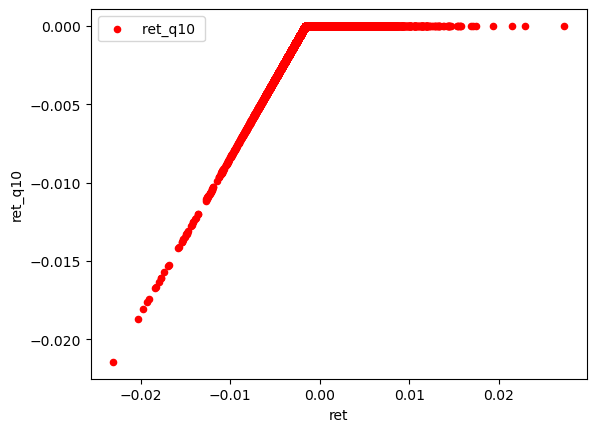

In [53]:
syms.plot(kind= 'scatter' , x= 'ret', y='ret_q10', color='r', label = 'ret_q10 ')

/var/folders/nd/mvq13b8j3msfgn8hkg4r_p200000gn/T/ipykernel_40327/1873130439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syms['r-act']= syms['ret'] -  (syms['ret']-q10).apply(relu)


<AxesSubplot: xlabel='ret', ylabel='r-act'>

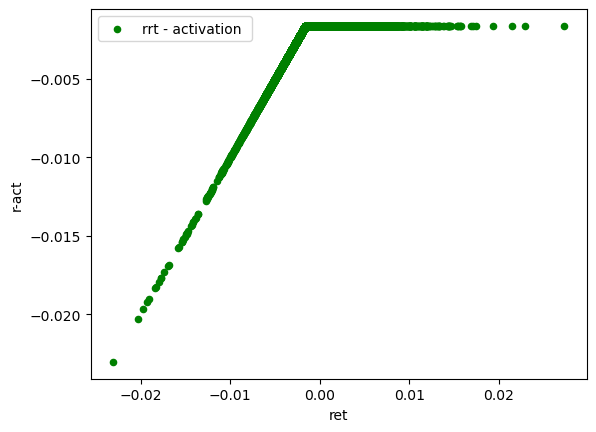

In [54]:

syms['r-act']= syms['ret'] -  (syms['ret']-q10).apply(relu)
syms.plot(kind= 'scatter' , x= 'ret', y='r-act', color='g', label = 'rrt - activation ')

# So relu activation function can also generate the second engineered feature

# By applying ReLU activiation function on a variable or a linear combination of variables we are engineering features that capture non-linear relationship between inputs and the  output variable

## What is ANN slow at, or not efficient with, is capturing interaction of a product effect between inputs, like  ret*volume

# There are two ways to handle that;
 # (i) creating a new input equal to the product of the two inputs
 # ( ii) Apply a log transformation for the product. According to the log function,
 # log( a * b ) = log(a) + log(b)    if a > 0 and b > 0
 # If each term is positive, the log of the product is the sum of the logs. 
  # In case of the variable 'ret' , we face the problem that ret can be negative.
  
   #  However, if we can change ret to 1+ret. Using (1 +ret) instead, does not sacrifice any information. But it allows capturing the the interation, it neutralizes any impact of the skewed distribution of volume and helps ML algorithm learn about the effect of this interaction.
   # Another function of ret is exp(ret). If instead of ret*volume we have exp(ret)*volume, then 
   # log ( exp(ret)*volume ) = log(exp(ret) + log(volume) = ret + log(volume)

In [55]:
syms['volume*ret']=syms['volume']*syms['ret']

/var/folders/nd/mvq13b8j3msfgn8hkg4r_p200000gn/T/ipykernel_40327/887418831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syms['volume*ret']=syms['volume']*syms['ret']


In [56]:
syms.columns

Index(['symbol', 'etf', 'day', 'time', 'high', 'low', 'next_ret', 'ret',
       'prev1_ret', 'prev2_ret', 'prev3_ret', 'prev4_ret', 'volume', 'mflow1',
       'mflow2', 'mflow3', 'mflow4', 'spy_high', 'spy_low', 'spy_next_ret',
       'spy_ret', 'spy_prev1_ret', 'spy_prev2_ret', 'spy_prev3_ret',
       'spy_prev4_ret', 'spy_volume', 'spy_mflow1', 'spy_mflow2', 'spy_mflow3',
       'spy_mflow4', 'etf_high', 'etf_low', 'etf_next_ret', 'etf_ret',
       'etf_prev1_ret', 'etf_prev2_ret', 'etf_prev3_ret', 'etf_prev4_ret',
       'etf_volume', 'etf_mflow1', 'etf_mflow2', 'etf_mflow3', 'etf_mflow4',
       'standaized_volume', 'log_volume', 'ret_q90', 'ret_q10',
       'relu_ret - q90', 'r-act', 'volume*ret'],
      dtype='object')

# Let us define the following df

In [57]:
vrs= ['symbol', 'etf', 'day', 'time',  
       'next_ret', 'ret', 'spy_ret', 'etf_ret',
      'volume' , 'standaized_volume', 'log_volume','volume*ret',
      'ret_q90', 'ret_q10']
syms1= syms[vrs]
syms1.columns

Index(['symbol', 'etf', 'day', 'time', 'next_ret', 'ret', 'spy_ret', 'etf_ret',
       'volume', 'standaized_volume', 'log_volume', 'volume*ret', 'ret_q90',
       'ret_q10'],
      dtype='object')

In [58]:
sym1_normalized = (syms1 - syms1.mean() )/syms1.std()
sym1_normalized.describe()

/var/folders/nd/mvq13b8j3msfgn8hkg4r_p200000gn/T/ipykernel_40327/1799848572.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sym1_normalized = (syms1 - syms1.mean() )/syms1.std()
/var/folders/nd/mvq13b8j3msfgn8hkg4r_p200000gn/T/ipykernel_40327/1799848572.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sym1_normalized = (syms1 - syms1.mean() )/syms1.std()


,etf_ret,log_volume,next_ret,ret,ret_q10,ret_q90,spy_ret,standaized_volume,volume,volume*ret
count,141917.000000,141917.000000,140128.000000,141917.000000,141917.000000,141917.000000,141917.000000,141917.000000,141917.000000,141917.000000
mean,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000
std,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
min,-7.600978,-6.925814,-13.543071,-14.550953,-34.672774,-0.198393,-6.937903,-0.564133,-0.564133,-167.612122
25%,-0.506394,-0.750093,-0.475162,-0.456234,0.201694,-0.198393,-0.549558,-0.429671,-0.429671,-0.027308
50%,-0.010079,-0.120205,-0.003184,-0.004121,0.201694,-0.198393,0.051225,-0.303424,-0.303424,-0.001784
75%,0.537937,0.633177,0.495390,0.473529,0.201694,-0.198393,0.598259,0.011166,0.011166,0.025889
max,7.682566,4.854310,18.178784,17.208538,0.201694,43.346665,4.728671,47.845240,47.845240,66.233704


## Here is a regression model with all the feature

In [60]:
print(vrs)

['symbol', 'etf', 'day', 'time', 'next_ret', 'ret', 'spy_ret', 'etf_ret', 'volume', 'standaized_volume', 'log_volume', 'volume*ret', 'ret_q90', 'ret_q10']


In [61]:
print( vrs[4:] )

['next_ret', 'ret', 'spy_ret', 'etf_ret', 'volume', 'standaized_volume', 'log_volume', 'volume*ret', 'ret_q90', 'ret_q10']


In [62]:
XY_syms1 = syms1[vrs[4:]].dropna()
X= XY_syms1[vrs[5:]]
y = XY_syms1['next_ret']
X = sm.add_constant(X)
lm1 = sm.OLS(y, X).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               next_ret   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     8.952
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           2.36e-12
Time:                        11:59:41   Log-Likelihood:             7.1238e+05
No. Observations:              140128   AIC:                        -1.425e+06
Df Residuals:                  140119   BIC:                        -1.425e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6.636e-05   4.88e-05     -1.358      0.174      -0.000    2.94e-05
ret                  -0.0203      0.005     -3.975      0.000      -0.030      -0.010
spy_ret               0.0173      0.008      2.117      0.034       0.001       0.033
etf_ret              -0.0138      0.006     -2.279      0.023      -0.026      -0.002
volume            -1.021e-10   6.47e-11     -1.578      0.114   -2.29e-10    2.47e-11
standaized_volume  3.745e-05   2.76e-05      1.358      0.174   -1.66e-05    9.15e-05
log_volume         8.505e-06   5.61e-06      1.516      0.129   -2.49e-06    1.95e-05
volume*ret         4.657e-09    1.5e-09      3.104      0.002    1.72e-09     7.6e-09
ret_q90              -0.0020      0.011     -0.184      0.854      -0.023       0.019
ret_q10               0.0102      0.010      0.982      0.326      -0.010       0.031
==============================================================================
Omnibus:                    22287.669   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           407658.661
Skew:                          -0.135   Prob(JB):                         0.00
Kurtosis:                      11.351   Cond. No.                     2.80e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.48e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [63]:
np.sqrt(lm1.rsquared)

0.022601846836989323

# some improvement in r. 
 ## However, lower F-stat. 
 ## Interaction between volume and return is significant. 
 ## volume itself ( including the two transformed volumes) is not significant

# Out-of-sample testing.
 ## Split the data to train and test
 ## standarizing train-data
 ## use train parameters to standarize test-data

In [53]:
syms1.columns

Index(['symbol', 'etf', 'day', 'time', 'next_ret', 'ret', 'spy_ret', 'etf_ret',
       'volume', 'standaized_volume', 'log_volume', 'volume*ret', 'ret_q90',
       'ret_q10'],
      dtype='object')

In [64]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [65]:
y = syms1['next_ret']

In [66]:
syms1_train, syms1_test, y_train, y_test = train_test_split(syms1, y, test_size=0.3, random_state= 12345)

In [67]:
vrs= syms1_train.columns
vrs

Index(['symbol', 'etf', 'day', 'time', 'next_ret', 'ret', 'spy_ret', 'etf_ret',
       'volume', 'standaized_volume', 'log_volume', 'volume*ret', 'ret_q90',
       'ret_q10'],
      dtype='object')

# The follwoing estimates the model on train data and tests it on test data

In [68]:
XY_train = syms1_train[vrs[4:]].dropna()
XY_test = syms1_test[vrs[4:]].dropna()
XY_train_standarized = (XY_train - XY_train.mean() )/XY_train.std() 
XY_test_standarized = (XY_test - XY_train.mean() )/XY_train.std()  # Note we standarize the test data with the 
X_train_standarized= XY_train_standarized[vrs[5:]]
X_test_standarized = XY_test_standarized[vrs[5:]]
y_train_standarized = XY_train_standarized['next_ret']
y_test_standarized =   XY_test_standarized['next_ret']

X_train_standarized = sm.add_constant(X_train_standarized)
X_test_standarized = sm.add_constant(X_test_standarized)
lm = sm.OLS(y_train_standarized, X_train_standarized).fit()
XY_train_standarized['pred'] = lm.predict(X_train_standarized)
XY_test_standarized['pred'] = lm.predict(X_test_standarized)
r_train = XY_train_standarized['pred'].corr(XY_train_standarized['next_ret'])
r_test = XY_test_standarized['pred'].corr(XY_test_standarized['next_ret'])

print(  'r_train = = ' , r_train)
print(  'r_test    =' , r_test )

r_train = =  0.03481413036810093
r_test    = -0.01831685638363239


## The out-of-sample performance is very not good

# 2. Introduction to Keras

# We should expect ANN to take care of non-linearity. 
## we will apply sequential ANN using raw basic variables without interactionsl
  ## Specifically [ 'ret' , spy_ret , etf_ret , volume ]
 # The point here see whether ANN can do all the work for us
## We will run ANN with all created interactions and see how much ANN improves ove our model with our manually developed interactions

 ## First, we 
#  (i) will install and use two python library : tensorflow and keras
 # Provide a description of Keras sequantial NN parameters 

In [69]:
!pip install tensorflow
!pip install keras

  Using cached numpy-1.19.5-cp38-cp38-macosx_10_9_x86_64.whl (15.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
xarray 2022.11.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
pandas 1.5.3 requires numpy>=1.20.3; python_version < "3.10", but you have numpy 1.19.5 which is incompatible.
bokeh 2.4.3 requires typing-extensions>=3.10.0, but you have typing-extensions 3.7.4.3 which is incompatible.


## A tensor is a multi-dimensional Array (including 2 or more dimesions)
## TensorFlow is an open source library for numerical computation and large-scale machine learning. 
 # It bundles Neural Network algorithms. 
 # It uses python to provide a convenient front-end API for building models. However, those applications get executed  C++

## TensorFlow allows creating data flow graphs. That is:
 # A structures that describe how data moves through a graph. 
 # Each node in the graph represents a mathematical operation.
 # Each connection or edge between nodes is a multi-dimensional data array-- tensor.

# Import these keras libraries

In [70]:

from keras.models import Sequential
from keras.layers import Dense

# With the “Sequential” we create a sequence of ANN layers stacked one after the other. 
 ## Each layer is defined using the “Dense” module of Keras.
## Keras Dense layer contains all the neurons that are deeply connected within themselves. Every neuron in the dense layer takes the input from all the other neurons of the previous layer.  
## We need to specify,
 # ( i) how many neurons would be there, 
 # (Ii) How we initialize the weights in the network. 
 # (iii) the activation function for each neuron in that layer

## Parameters to be specified:
  # 1. units= k means we are creating a layer with k neirons. Each of of which will be receiving input values

## input_dim=m: 
 # This means there are m predictors in the input data which is expected by the first layer. 
 # The Sequential model passes this information further to the next layers.


## kernel_initializer=’normal’: 
 # The algorithm has to decide the value for each weight. This parameter specifies that. You can choose different values for instead of ‘normal’ . The following link provides all the options:
 https://keras.io/api/layers/initializers/


## activation=’relu’: This specifies the activation function for the calculations inside each neuron. You can choose values like ‘relu’, ‘tanh’, ‘sigmoid’, etc.

## batch_size=n: 
 ## This specifies how many rows will be passed to the Network in one go after which the SSE calculation will begin. At this stage the neural network will start adjusting its weights based on the errors.
 ## When all the rows are passed in the batches of n rows each as specified in this parameter, then we call that 1-epoch. Or one full data cycle. 
 ## This is also known as mini-batch gradient descent. 
 ## A small value of batch_size will make the ANN look at the data slowly, 
 ## a large value will make the ANN look at the data fast which could lead to underfitting.
 ## a proper value must be chosen using hyperparameter tuning.

## Epochs = E: 
## The same activity of adjusting weights continues for E times, as specified by this parameter. 
# That is the ANN looks at the full training data E times and adjusts its weights.

In [71]:
print(vrs)

Index(['symbol', 'etf', 'day', 'time', 'next_ret', 'ret', 'spy_ret', 'etf_ret',
       'volume', 'standaized_volume', 'log_volume', 'volume*ret', 'ret_q90',
       'ret_q10'],
      dtype='object')


In [72]:
vrs[5:9]

Index(['ret', 'spy_ret', 'etf_ret', 'volume'], dtype='object')

# Here we specify inputs for the model

In [73]:
ann_basic_columns = [ 'ret' , 'volume' , 'spy_ret' , 'etf_ret' ]
x_train = X_train_standarized[ann_basic_columns]
x_test = X_test_standarized[ann_basic_columns]
y_train = XY_train_standarized['next_ret']
y_test = XY_test_standarized['next_ret']
print (x_train.shape, x_test.shape , y_train.shape , y_test.shape )

(98073, 4) (42055, 4) (98073,) (42055,)


In [74]:
from numpy.random import seed
from tensorflow.random import set_seed
set_seed(12345)

# In tensorflow setting the seed does not gaurenteed full replications on one machine or cross machines.

In [75]:
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=12, input_dim= 4, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=4, kernel_initializer='normal', activation='relu'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
from sklearn.metrics import r2_score
model.compile(loss='mse', optimizer='rmsprop', metrics=['cosine_proximity'], run_eagerly=True)
# model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(x_train, y_train ,batch_size = 60, epochs = 50, verbose=1)

2023-06-29 12:15:22.381637: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 12:15:22.608983: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
1635/1635 [==============================] - 18s 11ms/step - loss: 1.0000 - cosine_proximity: 0.0109
Epoch 2/50
1635/1635 [==============================] - 18s 11ms/step - loss: 0.9997 - cosine_proximity: 0.0212
Epoch 3/50
1635/1635 [==============================] - 17s 10ms/step - loss: 0.9995 - cosine_proximity: 0.0213
Epoch 4/50
1635/1635 [==============================] - 21s 13ms/step - loss: 0.9994 - cosine_proximity: 0.0231
Epoch 5/50
1635/1635 [==============================] - 21s 13ms/step - loss: 0.9993 - cosine_proximity: 0.0246
Epoch 6/50
1635/1635 [==============================] - 20s 12ms/step - loss: 0.9992 - cosine_proximity: 0.0238
Epoch 7/50
1635/1635 [==============================] - 17s 10ms/step - loss: 0.9991 - cosine_proximity: 0.0244
Epoch 8/50
1635/1635 [==============================] - 15s 9ms/step - loss: 0.9990 - cosine_proximity: 0.0256
Epoch 9/50
1635/1635 [==============================] - 15s 9ms/step - loss: 0.9989 - cosine_proximity: 0

## cosine proximity is corelation centered arround zero. Actually correlation between x and y is cosine proximity centered arount (x_mean, y_mean)

## Here we create a prediction column in the standarized-train-data and calculate the in-sample correlation coefficient between next_re and its prediction

In [75]:
XY_train_standarized ['basic_train_pred'] =  model.predict(x_train) 
XY_train_standarized ['basic_train_pred'].corr( XY_train_standarized ['next_ret'] )  

0.05242890441386137

## here we do the same for the out-of-sample correlation between next_ret and its prediction

In [76]:
XY_test_standarized ['basic_test_pred'] =  model.predict(x_test) 
XY_test_standarized ['basic_test_pred'].corr( XY_test_standarized ['next_ret'] ) 

0.017533535082320743

## it lokas like ANN delivers better out-of-sample results without having to include the manual interactions in the inputs. ANN took care of the interactions itself
 # with more epochs, we are likely to get better results

## What if we specify interaction variables in the input ? 
 # Can we further enhance the performance?

In [77]:
print( vrs[5:] )

Index(['ret', 'spy_ret', 'etf_ret', 'volume', 'standaized_volume',
       'log_volume', 'volume*ret', 'ret_q90', 'ret_q10'],
      dtype='object')


In [78]:
X_train_standarized.columns

Index(['const', 'ret', 'spy_ret', 'etf_ret', 'volume', 'standaized_volume',
       'log_volume', 'volume*ret', 'ret_q90', 'ret_q10'],
      dtype='object')

In [110]:
ann_columns = vrs[5:]
x_train = X_train_standarized[ann_columns]
x_test = X_test_standarized[ann_columns]
y_train = XY_train_standarized['next_ret']
y_test = XY_test_standarized['next_ret']
print (x_train.shape, x_test.shape , y_train.shape , y_test.shape )

(98073, 9) (42055, 9) (98073,) (42055,)


In [111]:
model = Sequential()

model.add(Dense(units=12, input_dim= 9, kernel_initializer='normal', activation='relu'))

model.add(Dense(units=4, kernel_initializer='normal', activation='relu'))

model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mse', optimizer='rmsprop', metrics=['cosine_proximity'], run_eagerly=True)
history = model.fit(x_train, y_train ,batch_size = 32, epochs = 50, verbose=1)

Epoch 1/50
3065/3065 [==============================] - 27s 9ms/step - loss: 1.0001 - cosine_proximity: 0.0095
Epoch 2/50
3065/3065 [==============================] - 27s 9ms/step - loss: 0.9996 - cosine_proximity: 0.0149
Epoch 3/50
3065/3065 [==============================] - 27s 9ms/step - loss: 0.9996 - cosine_proximity: 0.0208
Epoch 4/50
3065/3065 [==============================] - 27s 9ms/step - loss: 0.9994 - cosine_proximity: 0.0201
Epoch 5/50
3065/3065 [==============================] - 27s 9ms/step - loss: 0.9993 - cosine_proximity: 0.0228
Epoch 6/50
3065/3065 [==============================] - 27s 9ms/step - loss: 0.9992 - cosine_proximity: 0.0218
Epoch 7/50
3065/3065 [==============================] - 27s 9ms/step - loss: 0.9993 - cosine_proximity: 0.0202
Epoch 8/50
3065/3065 [==============================] - 29s 9ms/step - loss: 0.9991 - cosine_proximity: 0.0240
Epoch 9/50
3065/3065 [==============================] - 27s 9ms/step - loss: 0.9993 - cosine_proximity: 0.0239
E

In [112]:
print(history.params)

{'verbose': 1, 'epochs': 50, 'steps': 3065}


In [113]:
print(history.history.keys())

dict_keys(['loss', 'cosine_proximity'])


In [117]:
 ann0_cosine_proxinity = history.history['cosine_proximity']

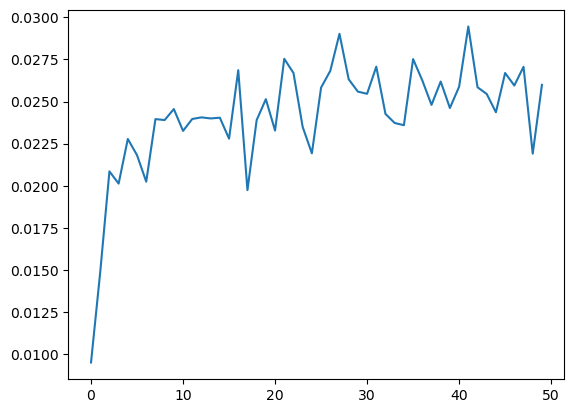

In [118]:
plt.plot(ann0_cosine_proxinity)

In [119]:
XY_train_standarized ['ann_train_pred'] =  model.predict(x_train) 
XY_train_standarized ['ann_train_pred'].corr( XY_train_standarized ['next_ret'] )  

0.05263228755527898

In [120]:
XY_test_standarized ['ann_test_pred'] =  model.predict(x_test) 
XY_test_standarized ['ann_test_pred'].corr( XY_test_standarized ['next_ret'] )  

0.012867340362783935

# Two conclusions
 ## (i) the basic ( with 4 basic inputs)  Sequential ANN model does better than a linear regression that includes the interaction terms ( 9 inputs in total)
 ## (ii) Adding the interaction variables to the inputs of the Sequential ANN did enhance out-of-sample performance. 
 ## (iii) The discrepancy between in-sample and out-of-sample performance is due to over fitting
 ## ( iv ) The higher number of neurons the higher is the number of the the estimated parameters. In this model the following describes the number of parameters

In [98]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 12)                120       
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 5         
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________


# The higher is the number of parameters the higher is the risk of overfitting

# Sequential Keras Models has a dropout specification which is basically a technique where randomly selected neurons are ignored during training. They are “dropped out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass, and any weight updates are not applied to the neuron on the backward pass.


## Here is a model specification with dropout specification

In [121]:
from keras.layers import Dropout
model = Sequential()

model.add(Dense(units=24, input_dim= 9, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=8, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mse', optimizer='rmsprop', metrics=['cosine_proximity'], run_eagerly=True)
history = model.fit(x_train, y_train ,batch_size = 32, epochs = 50, verbose=1)

Epoch 1/50
3065/3065 [==============================] - 31s 10ms/step - loss: 1.0001 - cosine_proximity: 0.0091
Epoch 2/50
3065/3065 [==============================] - 32s 11ms/step - loss: 0.9998 - cosine_proximity: 0.0111
Epoch 3/50
3065/3065 [==============================] - 32s 11ms/step - loss: 1.0001 - cosine_proximity: 0.0123
Epoch 4/50
3065/3065 [==============================] - 30s 10ms/step - loss: 1.0000 - cosine_proximity: 0.0132
Epoch 5/50
3065/3065 [==============================] - 30s 10ms/step - loss: 0.9998 - cosine_proximity: 0.0116
Epoch 6/50
3065/3065 [==============================] - 30s 10ms/step - loss: 0.9994 - cosine_proximity: 0.0153
Epoch 7/50
3065/3065 [==============================] - 30s 10ms/step - loss: 0.9999 - cosine_proximity: 0.0098
Epoch 8/50
3065/3065 [==============================] - 30s 10ms/step - loss: 1.0001 - cosine_proximity: 0.0157
Epoch 9/50
3065/3065 [==============================] - 31s 10ms/step - loss: 1.0004 - cosine_proximity:

In [122]:
XY_train_standarized ['ann_train_pred_dropout'] =  model.predict(x_train) 
XY_train_standarized ['ann_train_pred_dropout'].corr( XY_train_standarized ['next_ret'] )  

0.03354466054392664

In [123]:
XY_test_standarized ['ann_test_pred_dropout'] =  model.predict(x_test) 
XY_test_standarized ['ann_test_pred_dropout'].corr( XY_test_standarized ['next_ret'] )  

0.01648249890964182

# Notice how the regularization of the NN-- using droput , enhances the out-of-sample performance. On the other hand, the in-sample performance is lower.
 # However, the purpose is to have better out-of-sample performance

## Another conclusion here. Adding the additional manual features was not helpful

## Exploring all variables in the data

In [279]:
syms.columns

Index(['symbol', 'etf', 'day', 'time', 'high', 'low', 'next_ret', 'ret',
       'prev1_ret', 'prev2_ret', 'prev3_ret', 'prev4_ret', 'volume', 'mflow1',
       'mflow2', 'mflow3', 'mflow4', 'spy_high', 'spy_low', 'spy_next_ret',
       'spy_ret', 'spy_prev1_ret', 'spy_prev2_ret', 'spy_prev3_ret',
       'spy_prev4_ret', 'spy_volume', 'spy_mflow1', 'spy_mflow2', 'spy_mflow3',
       'spy_mflow4', 'etf_high', 'etf_low', 'etf_next_ret', 'etf_ret',
       'etf_prev1_ret', 'etf_prev2_ret', 'etf_prev3_ret', 'etf_prev4_ret',
       'etf_volume', 'etf_mflow1', 'etf_mflow2', 'etf_mflow3', 'etf_mflow4',
       'standaized_volume', 'log_volume', 'ret_q90', 'ret_q10',
       'relu_ret - q90', 'r-act', 'volume*ret'],
      dtype='object')

In [315]:
vrs_all = vrs_all = ['symbol', 'etf', 'day', 'time', 'next_ret',
           'ret', 'prev1_ret', 'prev2_ret', 'prev3_ret', 'prev4_ret', 
           'volume', 'mflow1', 'mflow2', 'mflow3', 'mflow4', 
           'spy_ret', 'spy_prev3_ret', 'spy_prev4_ret', 
           'spy_volume', 'spy_mflow1', 'spy_mflow2', 'spy_mflow3', 'spy_mflow4',
           'etf_ret', 'etf_prev1_ret', 'etf_prev2_ret', 'etf_prev3_ret', 'etf_prev4_ret',
           'etf_volume', 'etf_mflow1', 'etf_mflow2', 'etf_mflow3', 'etf_mflow4',
           'log_volume', 'ret_q90', 'ret_q10' ,  'volume*ret']

In [316]:
syms.shape

(141917, 50)

In [321]:
print( vrs_all[5:] )
len(vrs_all[5:] )

['ret', 'prev1_ret', 'prev2_ret', 'prev3_ret', 'prev4_ret', 'volume', 'mflow1', 'mflow2', 'mflow3', 'mflow4', 'spy_ret', 'spy_prev3_ret', 'spy_prev4_ret', 'spy_volume', 'spy_mflow1', 'spy_mflow2', 'spy_mflow3', 'spy_mflow4', 'etf_ret', 'etf_prev1_ret', 'etf_prev2_ret', 'etf_prev3_ret', 'etf_prev4_ret', 'etf_volume', 'etf_mflow1', 'etf_mflow2', 'etf_mflow3', 'etf_mflow4', 'log_volume', 'ret_q90', 'ret_q10', 'volume*ret']


32

In [327]:
XY = syms[vrs_all[4:]].dropna()
X= XY[vrs_all[5:]]
y = XY['next_ret']
X = sm.add_constant(X)
lm1 = sm.OLS(y, X).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               next_ret   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     9.973
Date:                Fri, 30 Jun 2023   Prob (F-statistic):           5.45e-49
Time:                        19:11:25   Log-Likelihood:             6.8719e+05
No. Observations:              132842   AIC:                        -1.374e+06
Df Residuals:                  132809   BIC:                        -1.374e+06
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -5.26e-05      7e-05     -0.752      0.452      -0.000    8.46e-05
ret              -0.0271      0.005     -5.368      0.000      -0.037      -0.017
prev1_ret        -0.0052      0.004     -1.322      0.186      -0.013       0.003
prev2_ret         0.0074      0.004      1.939      0.052   -7.98e-05       0.015
prev3_ret        -0.0065      0.004     -1.761      0.078      -0.014       0.001
prev4_ret         0.0177      0.003      5.394      0.000       0.011       0.024
volume         -1.13e-11   1.75e-11     -0.645      0.519   -4.57e-11     2.3e-11
mflow1         1.851e-09   2.94e-09      0.630      0.529   -3.91e-09    7.61e-09
mflow2        -1.264e-08   2.67e-09     -4.735      0.000   -1.79e-08   -7.41e-09
mflow3         1.589e-08   2.43e-09      6.534      0.000    1.11e-08    2.07e-08
mflow4        -1.035e-08   1.28e-09     -8.083      0.000   -1.29e-08   -7.84e-09
spy_ret           0.0378      0.008      4.500      0.000       0.021       0.054
spy_prev3_ret    -0.0144      0.011     -1.334      0.182      -0.036       0.007
spy_prev4_ret     0.0029      0.010      0.278      0.781      -0.017       0.023
spy_volume    -3.872e-12   3.94e-12     -0.981      0.326   -1.16e-11    3.86e-12
spy_mflow1     1.163e-08   4.68e-09      2.483      0.013    2.45e-09    2.08e-08
spy_mflow2       8.1e-09   4.64e-09      1.744      0.081      -1e-09    1.72e-08
spy_mflow3     1.624e-08   6.22e-09      2.610      0.009    4.05e-09    2.84e-08
spy_mflow4     -2.46e-08   5.42e-09     -4.538      0.000   -3.52e-08    -1.4e-08
etf_ret          -0.0303      0.007     -4.509      0.000      -0.043      -0.017
etf_prev1_ret    -0.0171      0.006     -2.822      0.005      -0.029      -0.005
etf_prev2_ret    -0.0086      0.006     -1.454      0.146      -0.020       0.003
etf_prev3_ret    -0.0048      0.006     -0.761      0.446      -0.017       0.008
etf_prev4_ret     0.0148      0.006      2.477      0.013       0.003       0.026
etf_volume     9.277e-12   7.78e-12      1.192      0.233   -5.98e-12    2.45e-11
etf_mflow1    -3.762e-09   7.17e-09     -0.524      0.600   -1.78e-08    1.03e-08
etf_mflow2      7.87e-09   7.08e-09      1.112      0.266      -6e-09    2.17e-08
etf_mflow3     3.377e-09   7.05e-09      0.479      0.632   -1.04e-08    1.72e-08
etf_mflow4    -9.518e-10   6.77e-09     -0.141      0.888   -1.42e-08    1.23e-08
log_volume     5.599e-06    6.2e-06      0.903      0.366   -6.55e-06    1.77e-05
ret_q90           0.0005      0.013      0.038      0.970      -0.025       0.026
ret_q10           0.0309      0.012      2.577      0.010       0.007       0.054
volume*ret     1.287e-08   3.38e-09      3.806      0.000    6.24e-09    1.95e-08
==============================================================================
Omnibus:                    18712.361   Durbin-Watso

In [328]:
np.sqrt( lm1.rsquared )

0.04896217584590711

In [286]:
print( vrs_all)


['symbol', 'etf', 'day', 'time', 'next_ret', 'ret', 'prev1_ret', 'prev2_ret', 'prev3_ret', 'prev4_ret', 'volume', 'mflow1', 'mflow2', 'mflow3', 'mflow4', 'spy_high', 'spy_low', 'spy_ret', 'spy_prev3_ret', 'spy_prev4_ret', 'spy_volume', 'spy_mflow1', 'spy_mflow2', 'spy_mflow3', 'spy_mflow4', 'etf_high', 'etf_low', 'etf_ret', 'etf_prev1_ret', 'etf_prev2_ret', 'etf_prev3_ret', 'etf_prev4_ret', 'etf_volume', 'etf_mflow1', 'etf_mflow2', 'etf_mflow3', 'etf_mflow4', 'log_volume', 'ret_q90', 'ret_q10', 'relu_ret - q90', 'r-act', 'volume*ret']


## Let us split the data and run the regression

In [329]:
y = syms['next_ret']
syms_train, syms_test, y_train, y_test = train_test_split(syms, y, test_size=0.3, random_state= 12345)
XY_train = syms_train[vrs_all[4:]].dropna()
XY_test = syms_test[vrs_all[4:]].dropna()

In [330]:
print ( len(vrs_all[4:]) )
print ( len(vrs_all[5:]) )

33
32


In [331]:
XY_train = syms_train[vrs_all[4:]].dropna()
XY_test = syms_test[vrs_all[4:]].dropna()
XY_train_standarized = (XY_train - XY_train.mean() )/XY_train.std() 
XY_test_standarized = (XY_test - XY_train.mean() )/XY_train.std()  # Note we standarize the test data with the 
X_train_standarized= XY_train_standarized[vrs_all[5:]]
X_test_standarized = XY_test_standarized[vrs_all[5:]]
y_train_standarized = XY_train_standarized['next_ret']
y_test_standarized =   XY_test_standarized['next_ret']

y_train = XY_train_standarized['next_ret']
y_test = XY_test_standarized['next_ret']

X_train_standarized = sm.add_constant(X_train_standarized)
X_test_standarized = sm.add_constant(X_test_standarized)
lm = sm.OLS(y_train_standarized, X_train_standarized).fit()
XY_train['pred'] = lm.predict(X_train_standarized) ## We are creating a prediction column based on standarized columns
XY_test['pred'] = lm.predict(X_test_standarized) ## We are creating a prediction column based on standarized columns
r_train = XY_train['pred'].corr(XY_train['next_ret'])
r_test = XY_test['pred'].corr(XY_test['next_ret'])
print(XY_train.shape , XY_test.shape)
print(  'r_train = = ' , r_train)
print(  'r_test    =' , r_test )


(93062, 34) (39780, 34)
r_train = =  0.05749681036606761
r_test    = 0.022957490670309316


## Note that while prediction is based on standarized variable, we added it as a column in the non-standarized data frames.
## It is known correlation between x and y is the same as the correlation beteen a1*x+b1  and a2y+b2.  While the magnitude of the prediction is scaled, we can still use it for identifying trade opportunities. We can also reverse scale it

# We can create a reverse-scaled ( inverted_back)  prediction. Here we create it and calculate a correlation matrix that shows this point

In [332]:
XY_train.columns

Index(['next_ret', 'ret', 'prev1_ret', 'prev2_ret', 'prev3_ret', 'prev4_ret',
       'volume', 'mflow1', 'mflow2', 'mflow3', 'mflow4', 'spy_ret',
       'spy_prev3_ret', 'spy_prev4_ret', 'spy_volume', 'spy_mflow1',
       'spy_mflow2', 'spy_mflow3', 'spy_mflow4', 'etf_ret', 'etf_prev1_ret',
       'etf_prev2_ret', 'etf_prev3_ret', 'etf_prev4_ret', 'etf_volume',
       'etf_mflow1', 'etf_mflow2', 'etf_mflow3', 'etf_mflow4', 'log_volume',
       'ret_q90', 'ret_q10', 'volume*ret', 'pred'],
      dtype='object')

In [334]:
XY_train['inverted_back_pred'] = XY_train['next_ret'].std() * XY_train['pred'] + XY_train['next_ret'].mean() 
XY_train.head(2)

,next_ret,ret,prev1_ret,prev2_ret,prev3_ret,prev4_ret,volume,mflow1,mflow2,mflow3,...,etf_mflow1,etf_mflow2,etf_mflow3,etf_mflow4,log_volume,ret_q90,ret_q10,volume*ret,pred,inverted_back_pred
217097,-0.000110,0.000550,0.000991,0.000328,-0.000110,0.000441,26909.000000,36.741958,7.204542,-3.318550,...,17.869431,78.129636,21.992600,32.440759,10.200216,0.000000,0.000000,14.800075,-0.010646,-0.000008
143188,-0.000778,-0.000111,0.000111,-0.000389,-0.001111,0.000278,23897.000000,1.636466,-6.957167,-37.434984,...,-58.205701,-376.783609,-55.306237,-344.297842,10.081508,0.000000,0.000000,-2.659039,0.008396,0.000018


In [335]:
XY_train[[ 'next_ret','inverted_back_pred' , 'pred']].agg(['mean', 'std'])

,next_ret,inverted_back_pred,pred
mean,0.000006,0.000006,0.000000
std,0.001374,0.000079,0.057497


In [336]:
XY_train[[ 'next_ret','inverted_back_pred' , 'pred']].corr()

,next_ret,inverted_back_pred,pred
next_ret,1.000000,0.057497,0.057497
inverted_back_pred,0.057497,1.000000,1.000000
pred,0.057497,1.000000,1.000000


## The results here  provides imprtovement over the earlier 9-independent variables regression model that used only current information. 

 # The variables here capture information that goes back four 5-minutes periods.  
 
 # It captures past returns and past money flow.
# money-flow is defined here as return times volume. It is actually interaction of volume and returns for the symbol, its etf and spy

# A more accurate definition for money flow is price change times volume. Here it is volume times percentage price changes (i.e. return)

In [337]:
print(X_train_standarized.columns)
print ( X_train_standarized.shape )

Index(['const', 'ret', 'prev1_ret', 'prev2_ret', 'prev3_ret', 'prev4_ret',
       'volume', 'mflow1', 'mflow2', 'mflow3', 'mflow4', 'spy_ret',
       'spy_prev3_ret', 'spy_prev4_ret', 'spy_volume', 'spy_mflow1',
       'spy_mflow2', 'spy_mflow3', 'spy_mflow4', 'etf_ret', 'etf_prev1_ret',
       'etf_prev2_ret', 'etf_prev3_ret', 'etf_prev4_ret', 'etf_volume',
       'etf_mflow1', 'etf_mflow2', 'etf_mflow3', 'etf_mflow4', 'log_volume',
       'ret_q90', 'ret_q10', 'volume*ret'],
      dtype='object')
(93062, 33)


## It looks like the correlation between next_ret and its prediction is relatively weak.
 # Does that mean it is useless?
 # Let us find out

## here we rename data frames

In [297]:
LM32_XY_train = XY_train
LM32_XY_test = XY_train
LM32_XY_test.columns

Index(['next_ret', 'ret', 'prev1_ret', 'prev2_ret', 'prev3_ret', 'prev4_ret',
       'volume', 'mflow1', 'mflow2', 'mflow3', 'mflow4', 'spy_high', 'spy_low',
       'spy_ret', 'spy_prev3_ret', 'spy_prev4_ret', 'spy_volume', 'spy_mflow1',
       'spy_mflow2', 'spy_mflow3', 'spy_mflow4', 'etf_high', 'etf_low',
       'etf_ret', 'etf_prev1_ret', 'etf_prev2_ret', 'etf_prev3_ret',
       'etf_prev4_ret', 'etf_volume', 'etf_mflow1', 'etf_mflow2', 'etf_mflow3',
       'etf_mflow4', 'log_volume', 'ret_q90', 'ret_q10', 'relu_ret - q90',
       'r-act', 'volume*ret', 'pred', 'inverted_back_pred'],
      dtype='object')

## The follwoing crates a original categorical variables thatmeasure the strength of the prediction

In [338]:
LM32_XY_test['pred_Quantile'] = pd.qcut(LM32_XY_test.pred,5 ,        
        labels=['Q1',
                'Q2',
                'Q3',
                'Q4', 'Q5'])

## Here we calculate stats on next_ret conditional on the prediction level (Quantile)

In [339]:
LM32_next_ret_byQ = LM32_XY_test.groupby('pred_Quantile')['next_ret'].agg(['mean', 'std', 'count'])
LM32_next_ret_byQ['t_stat'] = LM32_next_ret_byQ['mean']/(LM32_next_ret_byQ['std']/LM32_next_ret_byQ['count']**0.5)
LM32_next_ret_byQ = LM32_next_ret_byQ.reset_index()
LM32_next_ret_byQ

,pred_Quantile,mean,std,count,t_stat
0,Q1,-0.000083,0.001643,18613,-6.896201
1,Q2,-0.000003,0.001258,18612,-0.306734
2,Q3,0.000012,0.001192,18612,1.378208
3,Q4,0.000039,0.001200,18612,4.476846
4,Q5,0.000066,0.001510,18613,5.975800


# The fact that next_ret is increasing with prediction level. with significant t_stat indicates that the prediction is useful

## Comments on trading

## If you short the first and second quatimes and long the 4th and the fifth quatile you can make money
 # There are 78 5-minutes window in a day. we can actually calculate the daily return and approximate daily std

## Assume that we we short one dollar in each of Q1 and Q2 portfolio of stocks and long a dollar in Q4 and Q5  
 # This kind of approximate trading results


In [340]:
annual_avg_ret_LM32 =  ( -LM32_next_ret_byQ['mean'][0] - LM32_next_ret_byQ['mean'][1] +
                      ( LM32_next_ret_byQ['mean'][3] + LM32_next_ret_byQ['mean'][4] )/4 )*78*252
annual_std_ret_LM32 =np.sqrt (   ( LM32_next_ret_byQ['std'][0]**2 + LM32_next_ret_byQ['std'][1]**2 +
   LM32_next_ret_byQ['std'][3]**2 + LM32_next_ret_byQ['std'][4]**2 )/4  )*np.sqrt(78*252)
sharpe_LM32 = annual_avg_ret_LM32/annual_std_ret_LM32 
print( 'annual_avg_ret = ',  annual_avg_ret_LM32  )
print( 'annual_std_ret = ',  annual_std_ret_LM32  )  
print( 'sharpe-ratio = ' ,  sharpe_LM32)

## This can be optimistic, it ignores transaction cost and assumes that you can trade at the begining of the 5-minutes windo at the open price and set at the close price that window.
 # a more accurate analysis require simulation testing and an inventory management strategy.  Such staretegy may decide to seel or keep the position

annual_avg_ret =  2.2061889081911996
annual_std_ret =  0.198251913342575
sharpe-ratio =  11.128209917343664


## These are impressive results. However,
## This can be optimistic, it ignores transaction cost and assumes that you can trade at the begining of the 5-minutes windo at the open price and set at the close price that window.

 # a more accurate analysis require simulation testing and an inventory management strategy.  Such staretegy may decide to sell or keep the position for the next 5-minutes window

## Can ANN do a better job if we feed it the same inputs?

## The following code replaces XY_?? data frames. However, their information is in LM38_??

In [191]:
print(vrs_all)

['symbol', 'etf', 'day', 'time', 'next_ret', 'ret', 'prev1_ret', 'prev2_ret', 'prev3_ret', 'prev4_ret', 'volume', 'mflow1', 'mflow2', 'mflow3', 'mflow4', 'spy_high', 'spy_low', 'spy_ret', 'spy_prev3_ret', 'spy_prev4_ret', 'spy_volume', 'spy_mflow1', 'spy_mflow2', 'spy_mflow3', 'spy_mflow4', 'etf_high', 'etf_low', 'etf_ret', 'etf_prev1_ret', 'etf_prev2_ret', 'etf_prev3_ret', 'etf_prev4_ret', 'etf_volume', 'etf_mflow1', 'etf_mflow2', 'etf_mflow3', 'etf_mflow4', 'log_volume', 'ret_q90', 'ret_q10', 'relu_ret - q90', 'r-act', 'volume*ret']


In [311]:
vrs_all = ['symbol', 'etf', 'day', 'time', 'next_ret',
           'ret', 'prev1_ret', 'prev2_ret', 'prev3_ret', 'prev4_ret', 
           'volume', 'mflow1', 'mflow2', 'mflow3', 'mflow4', 
           'spy_ret', 'spy_prev3_ret', 'spy_prev4_ret', 
           'spy_volume', 'spy_mflow1', 'spy_mflow2', 'spy_mflow3', 'spy_mflow4',
           'etf_ret', 'etf_prev1_ret', 'etf_prev2_ret', 'etf_prev3_ret', 'etf_prev4_ret',
           'etf_volume', 'etf_mflow1', 'etf_mflow2', 'etf_mflow3', 'etf_mflow4',
           'log_volume', 'ret_q90', 'ret_q10' ,  'volume*ret']

In [313]:
print ( vrs_all[4:-4] )

['next_ret', 'ret', 'prev1_ret', 'prev2_ret', 'prev3_ret', 'prev4_ret', 'volume', 'mflow1', 'mflow2', 'mflow3', 'mflow4', 'spy_ret', 'spy_prev3_ret', 'spy_prev4_ret', 'spy_volume', 'spy_mflow1', 'spy_mflow2', 'spy_mflow3', 'spy_mflow4', 'etf_ret', 'etf_prev1_ret', 'etf_prev2_ret', 'etf_prev3_ret', 'etf_prev4_ret', 'etf_volume', 'etf_mflow1', 'etf_mflow2', 'etf_mflow3', 'etf_mflow4']


In [314]:
ann_XY_vars =vrs_all[4:-4]
ann_X_vars =vrs_all[5:-6]
print( ann_X_vars )
print()
print(len(ann_X_vars ) )
print()
print(  ann_X_vars )

['ret', 'prev1_ret', 'prev2_ret', 'prev3_ret', 'prev4_ret', 'volume', 'mflow1', 'mflow2', 'mflow3', 'mflow4', 'spy_ret', 'spy_prev3_ret', 'spy_prev4_ret', 'spy_volume', 'spy_mflow1', 'spy_mflow2', 'spy_mflow3', 'spy_mflow4', 'etf_ret', 'etf_prev1_ret', 'etf_prev2_ret', 'etf_prev3_ret', 'etf_prev4_ret', 'etf_volume', 'etf_mflow1', 'etf_mflow2']

26

['ret', 'prev1_ret', 'prev2_ret', 'prev3_ret', 'prev4_ret', 'volume', 'mflow1', 'mflow2', 'mflow3', 'mflow4', 'spy_ret', 'spy_prev3_ret', 'spy_prev4_ret', 'spy_volume', 'spy_mflow1', 'spy_mflow2', 'spy_mflow3', 'spy_mflow4', 'etf_ret', 'etf_prev1_ret', 'etf_prev2_ret', 'etf_prev3_ret', 'etf_prev4_ret', 'etf_volume', 'etf_mflow1', 'etf_mflow2']


In [260]:
XY_train = syms_train[ann_XY_vars].dropna()
XY_test =   syms_test[ann_XY_vars].dropna()
x_train = X_train_standarized[ann_X_vars]
x_test = X_test_standarized[ann_X_vars]
y_train = XY_train_standarized['next_ret']
y_test = XY_test_standarized['next_ret']
print (x_train.shape, x_test.shape , y_train.shape , y_test.shape )

(93062, 32) (39780, 32) (93062,) (39780,)


In [242]:
XY_test.columns

Index(['next_ret', 'ret', 'prev1_ret', 'prev2_ret', 'prev3_ret', 'prev4_ret',
       'volume', 'mflow1', 'mflow2', 'mflow3', 'mflow4', 'spy_high', 'spy_low',
       'spy_ret', 'spy_prev3_ret', 'spy_prev4_ret', 'spy_volume', 'spy_mflow1',
       'spy_mflow2', 'spy_mflow3', 'spy_mflow4', 'etf_high', 'etf_low',
       'etf_ret', 'etf_prev1_ret', 'etf_prev2_ret', 'etf_prev3_ret',
       'etf_prev4_ret', 'etf_volume', 'etf_mflow1', 'etf_mflow2', 'etf_mflow3',
       'etf_mflow4'],
      dtype='object')

In [243]:
n= len( x_train.columns )
n

32

In [261]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model32 = Sequential()

model32.add(Dense(units= 40, input_dim= n, kernel_initializer='normal', activation='relu'))
#model32.add(Dropout(0.25))
model32.add(Dense(units=20, kernel_initializer='normal', activation='relu'))
#model32.add(Dropout(0.1))
model32.add(Dense(1, kernel_initializer='normal'))

model32.compile(loss='mse', optimizer='rmsprop', metrics=['cosine_proximity'], run_eagerly=True)
history = model32.fit(x_train, y_train ,batch_size = 64, epochs = 100, verbose=1)

Epoch 1/100
1455/1455 [==============================] - 14s 10ms/step - loss: 0.9990 - cosine_proximity: 0.0213
Epoch 2/100
1455/1455 [==============================] - 13s 9ms/step - loss: 0.9962 - cosine_proximity: 0.0319
Epoch 3/100
1455/1455 [==============================] - 13s 9ms/step - loss: 0.9928 - cosine_proximity: 0.0378
Epoch 4/100
1455/1455 [==============================] - 13s 9ms/step - loss: 0.9905 - cosine_proximity: 0.0438
Epoch 5/100
1455/1455 [==============================] - 13s 9ms/step - loss: 0.9864 - cosine_proximity: 0.0486
Epoch 6/100
1455/1455 [==============================] - 14s 9ms/step - loss: 0.9829 - cosine_proximity: 0.0553
Epoch 7/100
1455/1455 [==============================] - 13s 9ms/step - loss: 0.9788 - cosine_proximity: 0.0563
Epoch 8/100
1455/1455 [==============================] - 13s 9ms/step - loss: 0.9773 - cosine_proximity: 0.0620
Epoch 9/100
1455/1455 [==============================] - 13s 9ms/step - loss: 0.9727 - cosine_proximity

1455/1455 [==============================] - 13s 9ms/step - loss: 0.9033 - cosine_proximity: 0.1193
Epoch 74/100
1455/1455 [==============================] - 13s 9ms/step - loss: 0.9049 - cosine_proximity: 0.1219
Epoch 75/100
1455/1455 [==============================] - 13s 9ms/step - loss: 0.9041 - cosine_proximity: 0.1226
Epoch 76/100
1455/1455 [==============================] - 13s 9ms/step - loss: 0.9054 - cosine_proximity: 0.1211
Epoch 77/100
1455/1455 [==============================] - 13s 9ms/step - loss: 0.9036 - cosine_proximity: 0.1199
Epoch 78/100
1455/1455 [==============================] - 13s 9ms/step - loss: 0.9019 - cosine_proximity: 0.1213
Epoch 79/100
1455/1455 [==============================] - 13s 9ms/step - loss: 0.9034 - cosine_proximity: 0.1212
Epoch 80/100
1455/1455 [==============================] - 13s 9ms/step - loss: 0.9010 - cosine_proximity: 0.1212
Epoch 81/100
1455/1455 [==============================] - 13s 9ms/step - loss: 0.9016 - cosine_proximity: 0.1

In [264]:
print(history.params)

{'verbose': 1, 'epochs': 100, 'steps': 1455}


In [262]:
ann_all_cosine_proxinity = history.history['cosine_proximity']

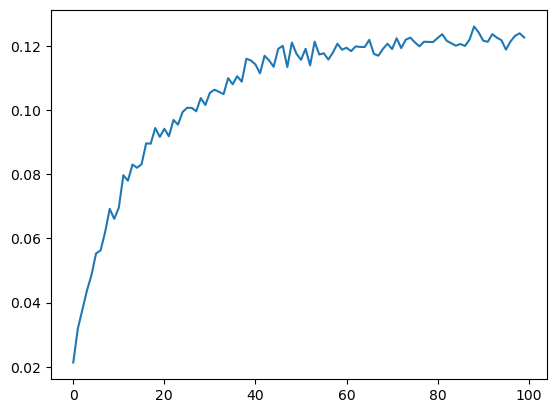

In [263]:
plt.plot(ann_all_cosine_proxinity)

## This is the in-sample pseudo-correlation ( cosine-proximity) as the as a function epoch in the optimization process. By epoch 80 we se a stabilization of this metric

In [265]:
print(history.params)
model.summary()

{'verbose': 1, 'epochs': 100, 'steps': 1455}
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 24)                240       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 200       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 9         
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


# Let us examine out-of-sample correlation between next_ret and its prediction

In [266]:
ANN32_XY_train = syms_train[vrs_all[4:]].dropna()
ANN32_XY_test = syms_test[vrs_all[4:]].dropna()
ANN32_XY_test.columns

Index(['next_ret', 'ret', 'prev1_ret', 'prev2_ret', 'prev3_ret', 'prev4_ret',
       'volume', 'mflow1', 'mflow2', 'mflow3', 'mflow4', 'spy_high', 'spy_low',
       'spy_ret', 'spy_prev3_ret', 'spy_prev4_ret', 'spy_volume', 'spy_mflow1',
       'spy_mflow2', 'spy_mflow3', 'spy_mflow4', 'etf_high', 'etf_low',
       'etf_ret', 'etf_prev1_ret', 'etf_prev2_ret', 'etf_prev3_ret',
       'etf_prev4_ret', 'etf_volume', 'etf_mflow1', 'etf_mflow2', 'etf_mflow3',
       'etf_mflow4', 'log_volume', 'ret_q90', 'ret_q10', 'relu_ret - q90',
       'r-act', 'volume*ret'],
      dtype='object')

In [267]:
ANN32_XY_train ['ann_train_pred'] =  model32.predict(x_train) 
print ( 'in-sample-r = ', ANN32_XY_train ['ann_train_pred'].corr( ANN32_XY_train ['next_ret'] )  )

in-sample-r =  0.34936451051396156


In [268]:
ANN32_XY_test ['ann_test_pred'] =  model32.predict(x_test) 
print ( 'out-of-sample-r = ' , ANN32_XY_test ['ann_test_pred'].corr( ANN32_XY_test['next_ret'] ) ) 

out-of-sample-r =  0.12656173155041073


## Very impressive performance. The out of sample correlation between actual and prediction  is multiple times its linear model with ellaborite manual interactions 

## Note howver, that without developing these interactions, the ANN performance is rather limited

## The conclusion here is that you need to study and understand the problem, engineer features from such understanding and then apply ANN

## This ANN can be optimized for different hyper-parameters and using more data on factors not available to us

In [269]:
ANN32_XY_test.columns

Index(['next_ret', 'ret', 'prev1_ret', 'prev2_ret', 'prev3_ret', 'prev4_ret',
       'volume', 'mflow1', 'mflow2', 'mflow3', 'mflow4', 'spy_high', 'spy_low',
       'spy_ret', 'spy_prev3_ret', 'spy_prev4_ret', 'spy_volume', 'spy_mflow1',
       'spy_mflow2', 'spy_mflow3', 'spy_mflow4', 'etf_high', 'etf_low',
       'etf_ret', 'etf_prev1_ret', 'etf_prev2_ret', 'etf_prev3_ret',
       'etf_prev4_ret', 'etf_volume', 'etf_mflow1', 'etf_mflow2', 'etf_mflow3',
       'etf_mflow4', 'log_volume', 'ret_q90', 'ret_q10', 'relu_ret - q90',
       'r-act', 'volume*ret', 'ann_test_pred'],
      dtype='object')

## This examines the ditribution of the prediction. Bear in mind that this is based on standarized predictors.

In [270]:
ANN32_XY_test['ann_test_pred'].describe()

count   39780.000000
mean        0.009167
std         0.347880
min       -19.095949
25%        -0.070648
50%         0.028429
75%         0.100613
max        12.996968
Name: ann_test_pred, dtype: float64

## while this is not needed for further analysis, here how we can scale bac this prediction

In [271]:
std = XY_train['next_ret'].std()
mean = XY_train['next_ret'].mean()
print( std, mean)
ANN32_XY_test['scaled_back_test_pred'] = std* ANN32_XY_test['ann_test_pred'] + mean
ANN32_XY_test[[ 'next_ret' , 'ann_test_pred', 'scaled_back_test_pred']].describe()

0.00137350311140441 6.333398168337202e-06


,next_ret,ann_test_pred,scaled_back_test_pred
count,39780.000000,39780.000000,39780.000000
mean,0.000005,0.009167,0.000019
std,0.001372,0.347880,0.000478
min,-0.016928,-19.095949,-0.026222
25%,-0.000676,-0.070648,-0.000091
50%,0.000000,0.028429,0.000045
75%,0.000720,0.100613,0.000145
max,0.015737,12.996968,0.017858


## Scaling back is important if one needs to create a trading triger that compares prediction to transaction cost.
### in this demonstration we don't need it

## here we print Quantiles thresholds

In [255]:
 for q in [0.2,0.4,0.6, 0.8]:
        print( "% .6f" %ANN32_XY_test['ann_test_pred'].quantile(q), 
        "% .6f" %ANN32_XY_test[ 'scaled_back_test_pred'].quantile(q) )


-0.077283 -0.000100
-0.015968 -0.000016
 0.036099  0.000056
 0.128232  0.000182


## Impact on trading

In [272]:
ANN32_XY_test['pred_Quantile'] = pd.qcut(ANN32_XY_test['ann_test_pred'],5 ,        
        labels=['Q1',
                'Q2',
                'Q3',
                'Q4', 'Q5'])

In [273]:
ANN32_next_ret_byQ = ANN32_XY_test.groupby('pred_Quantile')['next_ret'].agg(['mean', 'std', 'count'])
ANN32_next_ret_byQ['t_stat'] = ANN32_next_ret_byQ['mean']/(ANN32_next_ret_byQ['std']/np.sqrt(ANN32_next_ret_byQ['count']) )
ANN32_next_ret_byQ

,mean,std,count,t_stat
pred_Quantile,,,,
Q1,-0.000228,0.001632,7956,-12.485205
Q2,-0.000035,0.001227,7956,-2.574171
Q3,0.000019,0.001092,7956,1.524093
Q4,0.000035,0.001171,7956,2.676654
Q5,0.000237,0.001603,7956,13.171546


In [274]:
ANN32_next_ret_byQ = ANN32_XY_test.groupby('pred_Quantile')['next_ret'].agg(['mean', 'std', 'count'])
annual_avg_ret = ( ( -ANN32_next_ret_byQ['mean'][0] - ANN32_next_ret_byQ['mean'][1] +
   ANN32_next_ret_byQ['mean'][3] + ANN32_next_ret_byQ['mean'][4] )/4 )*78*252
annual_std_ret =np.sqrt (   ( ANN32_next_ret_byQ['std'][0]**2 + ANN32_next_ret_byQ['std'][1]**2 +
   ANN32_next_ret_byQ['std'][3]**2 + ANN32_next_ret_byQ['std'][4]**2 )/4  )*np.sqrt(78*252)
print( 'annual_avg_ret = ',  annual_avg_ret  )
print( 'annual_std_ret = ',  annual_std_ret  )  
print( 'sharpe-ratio = ' ,  annual_avg_ret/annual_std_ret )

annual_avg_ret =  2.6326524619428042
annual_std_ret =  0.19964758665620733
sharpe-ratio =  13.18649779862466


# The ANN provides better T-stat for the quatiles{1,2,4,5]  and better trading results 

##  Manual feature engineering has done relatively well

# In this run we excluded the following variable:
###   ['log_volume', 'ret_q90', 'ret_q10', 'relu_ret - q90', 'r-act', 'volume*ret']
## These are manually engineered variables. I found out that including them in the ANN model resulted in worse results
## I also run the model with uncommenting the droput lines. Again the performance was worse
## 100 epochs provided better performance than 50 epochs
